In [318]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 데이터 불러오기

In [319]:
file_path = '~/aiffel/main_project/02_Project/online_retail_II.xlsx'

In [320]:
file_path

'~/aiffel/main_project/02_Project/online_retail_II.xlsx'

In [321]:
# 엑셀파일 불러와서 xlsx에 저장
xlsx = pd.ExcelFile(file_path)

In [322]:
#엑셀 시트명 확인하기
print(xlsx.sheet_names)

['Year 2009-2010', 'Year 2010-2011']


In [323]:
#첫번째 시트 df1에 저장하기
df1 = pd.read_excel(file_path, sheet_name='Year 2009-2010')

In [324]:
#두번째 시트 df2에 저장하기
df2 = pd.read_excel(file_path, sheet_name='Year 2010-2011')

In [325]:
#df1 , df2  시트를 붙이기
retail = pd.concat([df1, df2], ignore_index=True)

# 데이터 확인하기

In [326]:
#데이터의 첫 5개 행 출력
retail.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [327]:
#데이터 정보
retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067371 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype         
---  ------       --------------    -----         
 0   Invoice      1067371 non-null  object        
 1   StockCode    1067371 non-null  object        
 2   Description  1062989 non-null  object        
 3   Quantity     1067371 non-null  int64         
 4   InvoiceDate  1067371 non-null  datetime64[ns]
 5   Price        1067371 non-null  float64       
 6   Customer ID  824364 non-null   float64       
 7   Country      1067371 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 65.1+ MB


In [328]:
#결측치 확인하기
retail.isnull().sum()

Invoice             0
StockCode           0
Description      4382
Quantity            0
InvoiceDate         0
Price               0
Customer ID    243007
Country             0
dtype: int64

# 데이터 전처리 
* 날짜 타입으로 변환하기
* 결측치 처리하기
* Total 금액 만들기

In [329]:
#InvoiceDate 컬럼을 날짜 형식으로 변환하고 InvoiceDate_DT 칼럼 만들기
retail['InvoiceDate_DT'] = pd.to_datetime(retail['InvoiceDate'])

In [330]:
#추가된 칼럼 확인하기
retail.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,InvoiceDate_DT
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,2009-12-01 07:45:00
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,2009-12-01 07:45:00
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,2009-12-01 07:45:00
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,2009-12-01 07:45:00
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,2009-12-01 07:45:00


In [331]:
# CustomerID 결측치 제거
retail = retail.dropna(subset = ['Customer ID'])

In [332]:
# Customer ID 정수형으로 변환하기
retail['Customer ID'] = retail['Customer ID'].astype(int)

In [333]:
#InvoiceDate를 기준으로 데이터를 정렬
retail = retail.sort_values(by='InvoiceDate')

In [366]:
# total 금액 생성
retail['Total'] = retail['Quantity'] * retail['Price']

In [335]:
retail.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,InvoiceDate_DT,Total
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085,United Kingdom,2009-12-01 07:45:00,83.4
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom,2009-12-01 07:45:00,81.0
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom,2009-12-01 07:45:00,81.0
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085,United Kingdom,2009-12-01 07:45:00,100.8
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085,United Kingdom,2009-12-01 07:45:00,30.0


# 나라별 구매 인원 시각화

* 나라별로 구매인원 구하기
* 데이터를 batplot으로 시각화하기

In [336]:
#나라별 CustomerID Unique값으로 묶기
Country_Customer = retail.groupby('Country')['Customer ID'].nunique().reset_index()

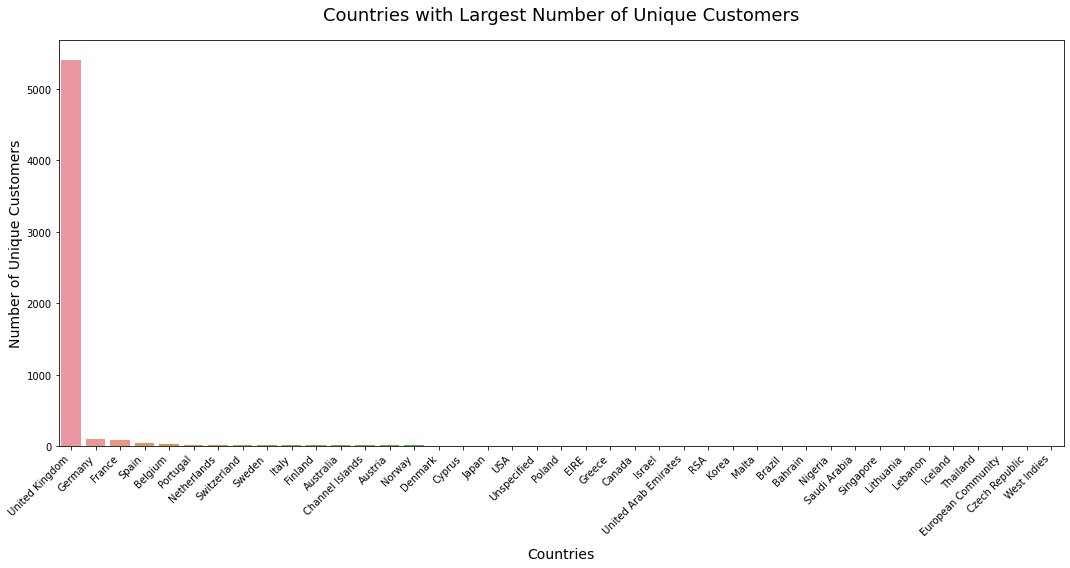

In [337]:
Country_Customer = Country_Customer.sort_values('Customer ID', ascending=False)

plt.figure(figsize=(15, 8))

sns.barplot(x='Country', y='Customer ID', data=Country_Customer)

plt.title('Countries with Largest Number of Unique Customers', fontsize=18, pad=20)
plt.xlabel('Countries', fontsize=14, labelpad=10)
plt.ylabel('Number of Unique Customers', fontsize=14)
plt.xticks(rotation=45, ha='right') 
plt.tight_layout()
plt.show()

# Acquisition (고객 유입 분석)

* 고객의 첫 구매시점을 기준으로 월별 신규 유입 고객수를 만들기
* 월별 신규 고객수를 barplot으로 시각화하기

In [338]:
# 고객의 첫 구매날짜 추출
first_InvoiceDate = retail.groupby('Customer ID')['InvoiceDate'].min().reset_index()

In [339]:
# 첫 구매 날짜에서 년도와 월 추출
first_InvoiceDate['month'] = first_InvoiceDate['InvoiceDate'].dt.to_period('M')

In [340]:
# 월별 신규 고객 수 
YearMonth_firstCustomer = first_InvoiceDate.groupby('month')['Customer ID'].nunique().reset_index()

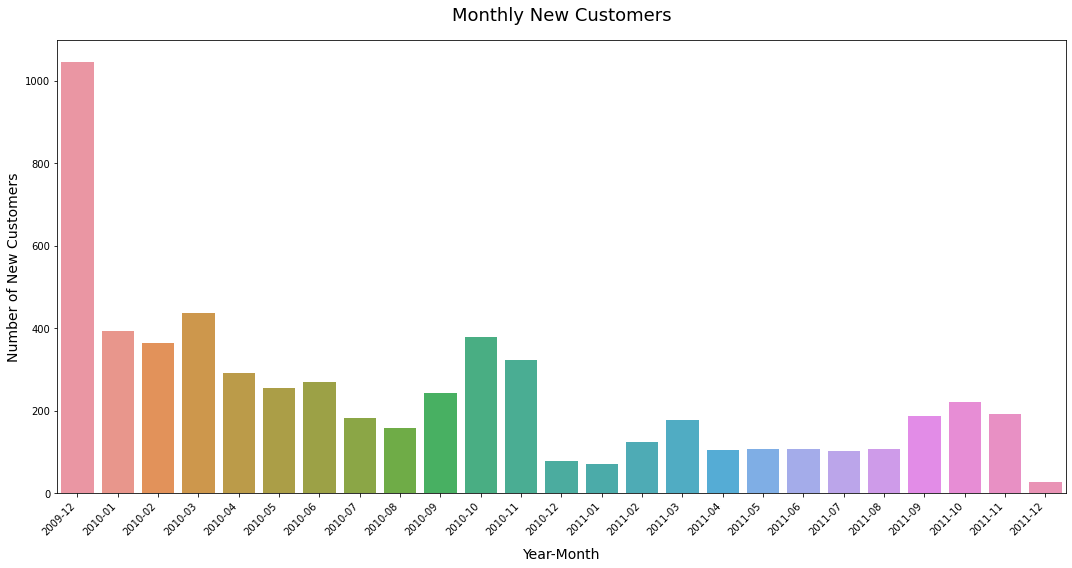

In [341]:
# 월별 신규 고객 수 시각화

plt.figure(figsize=(15, 8))

sns.barplot(x='month', y='Customer ID', data=YearMonth_firstCustomer)

plt.title('Monthly New Customers', fontsize=18, pad=20)
plt.xlabel('Year-Month', fontsize=14, labelpad=10)
plt.ylabel('Number of New Customers', fontsize=14)
plt.xticks(rotation=45, ha='right') 
plt.tight_layout()
plt.show()

In [342]:
retail

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,InvoiceDate_DT,Total
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085,United Kingdom,2009-12-01 07:45:00,83.40
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom,2009-12-01 07:45:00,81.00
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom,2009-12-01 07:45:00,81.00
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085,United Kingdom,2009-12-01 07:45:00,100.80
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085,United Kingdom,2009-12-01 07:45:00,30.00
...,...,...,...,...,...,...,...,...,...,...
1067357,581587,22555,PLASTERS IN TIN STRONGMAN,12,2011-12-09 12:50:00,1.65,12680,France,2011-12-09 12:50:00,19.80
1067356,581587,22556,PLASTERS IN TIN CIRCUS PARADE,12,2011-12-09 12:50:00,1.65,12680,France,2011-12-09 12:50:00,19.80
1067369,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680,France,2011-12-09 12:50:00,14.85
1067361,581587,22730,ALARM CLOCK BAKELIKE IVORY,4,2011-12-09 12:50:00,3.75,12680,France,2011-12-09 12:50:00,15.00


# Activation (고객 활성화 분석)

* 모든 고객에서 첫 구매 이후 총 구매 금액이 특정 기준 금액 (£50) 이상인 고객을 활성화된 고객으로 정의하기
* 전체 고객 수 와 활성된 고객 수를 비교하여 활성화율 만들기

In [367]:
# 첫구매 날짜 칼럼 만들어주기.
retail['First_invoice'] = retail.groupby('Customer ID')['InvoiceDate'].transform('min')

# 2. 첫 구매 이후 데이터만 필터링
retail_after_first = retail[retail['InvoiceDate'] > retail['First_invoice']]

# 3. 첫 구매 이후 Total 금액을 고객별로 합산
after_first_total = retail_after_first.groupby('Customer ID')['Total'].sum().reset_index()

# 4. 활성화 고객 정의: 총합이 50 이상인 고객
activated_customers = after_first_total[after_first_total['Total'] >= 50]['Customer ID'].nunique()

# 5. 활성화 된 고객 비율
activation_rate = activated_customers / total_customers * 100

In [344]:
print(f"총 고객 수: {total_customers}")
print(f"활성화된 고객 수 (첫 구매 후 50 이상 지출한 고객): {activated_customers}")
print(f"고객 활성화율: {activation_rate:.2f}%")


총 고객 수: 5942
활성화된 고객 수 (첫 구매 후 50 이상 지출한 고객): 4169
고객 활성화율: 70.16%


# Retention:코호트 분석(고객)

* 분기별 활성 사용자를 분석하여 고객 유지 현황을 파악하기
* 현황을 히트맵으로 시각화하여 고객 유지 트렌드를 분석하기

In [346]:
retail.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 824364 entries, 0 to 1067370
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   Invoice         824364 non-null  object        
 1   StockCode       824364 non-null  object        
 2   Description     824364 non-null  object        
 3   Quantity        824364 non-null  int64         
 4   InvoiceDate     824364 non-null  datetime64[ns]
 5   Price           824364 non-null  float64       
 6   Customer ID     824364 non-null  int64         
 7   Country         824364 non-null  object        
 8   InvoiceDate_DT  824364 non-null  datetime64[ns]
 9   Total           824364 non-null  float64       
 10  First_invoice   824364 non-null  datetime64[ns]
dtypes: datetime64[ns](3), float64(2), int64(2), object(4)
memory usage: 75.5+ MB


In [347]:
# 날짜를 분기로 변환
retail['InvoiceQuarter'] = retail['InvoiceDate_DT'].dt.to_period('Q')
retail['CohortQuarter'] = retail['First_invoice'].dt.to_period('Q')

# 코호트 인덱스 계산 (가입 후 몇 분기 차)
retail['CohortIndex'] = (retail['InvoiceQuarter'] - retail['CohortQuarter']).apply(lambda x: x.n)

# 코호트 분석 테이블 생성
cohort_data = retail.groupby(['CohortQuarter', 'CohortIndex'])['Customer ID'].nunique().reset_index()
cohort_pivot = cohort_data.pivot(index='CohortQuarter', columns='CohortIndex', values='Customer ID')


# 첫 분기의 사용자 수 (잔존율 기준값)
cohort_sizes = cohort_pivot.iloc[:, 0]
retention = cohort_pivot.divide(cohort_sizes, axis=0) * 100

In [348]:
retention

CohortIndex,0,1,2,3,4,5,6,7,8
CohortQuarter,,,,,,,,,
2009Q4,100.0,64.401914,65.837321,59.234450,68.325359,50.239234,49.473684,48.708134,54.736842
2010Q1,100.0,51.131601,48.030176,50.963956,34.870075,36.127410,37.217100,34.199497,NaN
2010Q2,100.0,39.803440,42.751843,22.481572,30.098280,27.886978,29.975430,NaN,NaN
2010Q3,100.0,48.198971,25.385935,26.586621,32.933105,32.246998,NaN,NaN,NaN
2010Q4,100.0,21.593830,25.192802,20.822622,35.347044,NaN,NaN,NaN,NaN
2011Q1,100.0,42.741935,33.602151,36.559140,NaN,NaN,NaN,NaN,NaN
2011Q2,100.0,44.236760,39.563863,NaN,NaN,NaN,NaN,NaN,NaN
2011Q3,100.0,53.164557,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011Q4,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


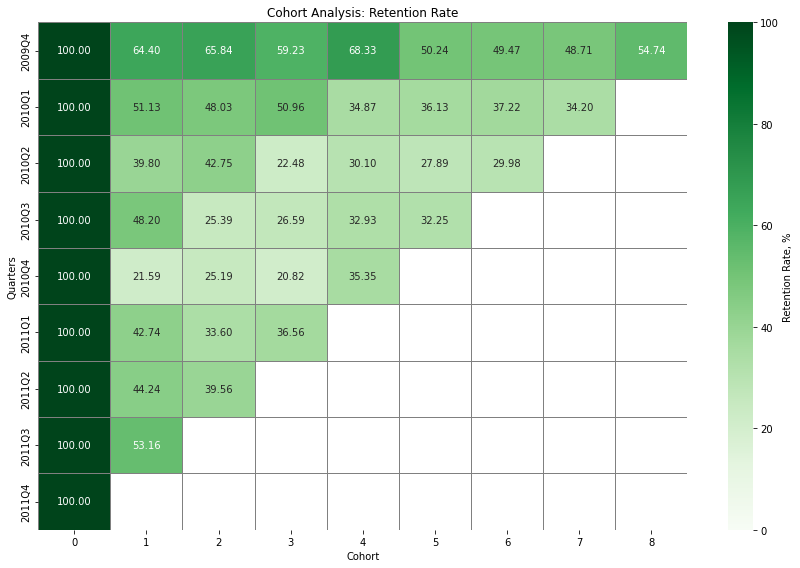

In [349]:
# 히트맵 시각화

plt.figure(figsize=(12, 8))
heatmap = sns.heatmap(
    data=retention,
    annot=True,                # 셀 내부에 값 표시
    fmt='.2f',                 # 텍스트 형식 (소수점 2자리)
    cmap='Greens',             # 색상 팔레트
    cbar_kws={'label': 'Retention Rate, %'},  # 컬러바 제목
    linewidths=0.5,            # 셀 간격
    linecolor='gray',          # 셀 경계 색상
    vmin=0, vmax=100           # Retention Rate의 범위 설정
)

plt.title("Cohort Analysis: Retention Rate")
plt.xlabel("Cohort")
plt.ylabel("Quarters")
plt.tight_layout()
plt.show()

# Retention: 코호트 분석(평균 구매수량)

* 기단위의 활성 사용자의 평균 구매수량을 분석하기
* 분석한 결과를 히트맵으로 만들기

In [350]:
# 코호트별 평균 구매수량 계산
cohort_qty = retail.groupby(['CohortQuarter', 'CohortIndex'])['Quantity'].mean().reset_index()

# 피벗 테이블 만들기
average_quantity = cohort_qty.pivot(index='CohortQuarter', columns='CohortIndex', values='Quantity')

In [351]:
cohort_qty

,CohortQuarter,CohortIndex,Quantity
0,2009Q4,0,12.288602
1,2009Q4,1,21.076391
2,2009Q4,2,13.362480
3,2009Q4,3,15.464211
4,2009Q4,4,13.549914
5,2009Q4,5,15.362895
6,2009Q4,6,14.956008
7,2009Q4,7,15.968218
8,2009Q4,8,14.509715
9,2010Q1,0,9.651855


In [352]:
average_quantity

CohortIndex,0,1,2,3,4,5,6,7,8
CohortQuarter,,,,,,,,,
2009Q4,12.288602,21.076391,13.362480,15.464211,13.549914,15.362895,14.956008,15.968218,14.509715
2010Q1,9.651855,11.982118,11.723858,10.863366,10.647503,10.993354,12.961459,10.211015,NaN
2010Q2,10.437856,11.478243,9.811143,15.442831,14.882952,15.791417,9.594326,NaN,NaN
2010Q3,13.889201,7.990053,9.895508,11.931285,14.125486,10.269787,NaN,NaN,NaN
2010Q4,7.621444,8.344081,8.314231,9.525700,8.693133,NaN,NaN,NaN,NaN
2011Q1,9.814703,13.467717,12.559367,11.576981,NaN,NaN,NaN,NaN,NaN
2011Q2,8.826865,11.271825,9.158496,NaN,NaN,NaN,NaN,NaN,NaN
2011Q3,9.202391,6.197705,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011Q4,9.111207,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


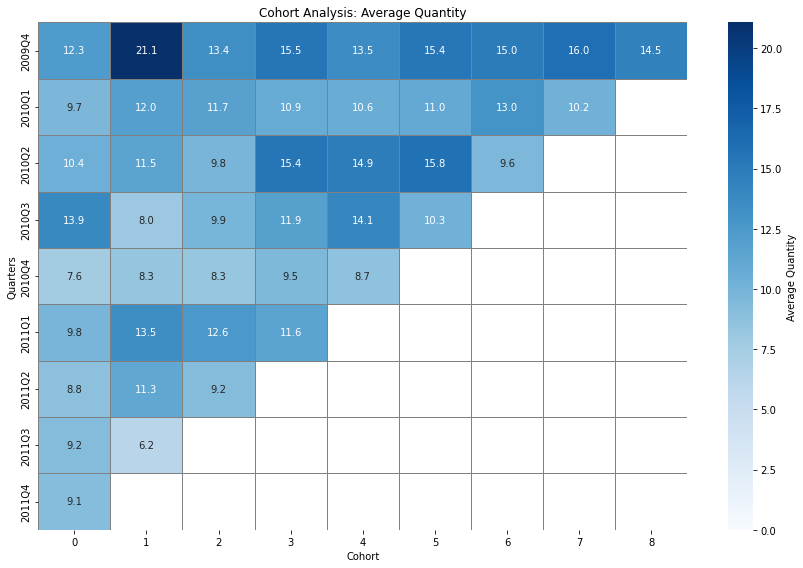

In [353]:
#heatmap 코드

plt.figure(figsize=(12, 8))

heatmap = sns.heatmap(
    data=average_quantity,
    annot=True,                # 셀 내부에 값 표시
    fmt='.1f',                 # 텍스트 형식 (소수점 1자리)
    cmap='Blues',              # 색상 팔레트
    cbar_kws={'label': 'Average Quantity'},  # 컬러바 제목
    linewidths=0.5,            # 셀 간격
    linecolor='gray',          # 셀 경계 색상
    vmin=0                     # 최소값 설정 (필요 시 조정 가능)
)

plt.title("Cohort Analysis: Average Quantity")
plt.xlabel("Cohort")
plt.ylabel("Quarters")
plt.tight_layout()
plt.show()

# Revenue : ARPU

* 각 고객의 월별 구매 금액을 집계하고, 이를 기반으로 ARPU를 분석하기

In [354]:
# InvoiceDate에서 월 단위 날짜로 변환하기하여 칼럼에 저장하기
retail['YearMonth'] = retail['InvoiceDate'].dt.to_period('M')

In [355]:
retail

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,InvoiceDate_DT,Total,First_invoice,InvoiceQuarter,CohortQuarter,CohortIndex,YearMonth
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085,United Kingdom,2009-12-01 07:45:00,83.40,2009-12-01 07:45:00,2009Q4,2009Q4,0,2009-12
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom,2009-12-01 07:45:00,81.00,2009-12-01 07:45:00,2009Q4,2009Q4,0,2009-12
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom,2009-12-01 07:45:00,81.00,2009-12-01 07:45:00,2009Q4,2009Q4,0,2009-12
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085,United Kingdom,2009-12-01 07:45:00,100.80,2009-12-01 07:45:00,2009Q4,2009Q4,0,2009-12
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085,United Kingdom,2009-12-01 07:45:00,30.00,2009-12-01 07:45:00,2009Q4,2009Q4,0,2009-12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1067357,581587,22555,PLASTERS IN TIN STRONGMAN,12,2011-12-09 12:50:00,1.65,12680,France,2011-12-09 12:50:00,19.80,2011-08-18 15:44:00,2011Q4,2011Q3,1,2011-12
1067356,581587,22556,PLASTERS IN TIN CIRCUS PARADE,12,2011-12-09 12:50:00,1.65,12680,France,2011-12-09 12:50:00,19.80,2011-08-18 15:44:00,2011Q4,2011Q3,1,2011-12
1067369,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680,France,2011-12-09 12:50:00,14.85,2011-08-18 15:44:00,2011Q4,2011Q3,1,2011-12
1067361,581587,22730,ALARM CLOCK BAKELIKE IVORY,4,2011-12-09 12:50:00,3.75,12680,France,2011-12-09 12:50:00,15.00,2011-08-18 15:44:00,2011Q4,2011Q3,1,2011-12


In [356]:
# groupby로 고객별 월별 구매 금액을 더하기
monthly_Total = retail.groupby(['YearMonth', 'Customer ID'])['Total'].sum().reset_index()

In [357]:
# arpu 계산하기

arpu = monthly_Total.groupby('YearMonth').agg(total_revenue=('Total', 'sum'),
                                              unique_users=('Customer ID', 'nunique')).reset_index()

arpu = arpu['total_revenue'] / arpu['unique_users']

In [358]:
arpu

0     634.710096
1     676.784863
2     606.443105
3     572.454078
4     561.758539
5     527.235923
6     521.881196
7     569.621356
8     609.187199
9     649.778121
10    611.914889
11    674.319241
12    906.357985
13    606.736117
14    547.050313
15    568.592755
16    473.913071
17    600.788767
18    578.509191
19    578.286486
20    628.946939
21    715.391991
22    683.932344
23    661.839708
24    499.306676
dtype: float64

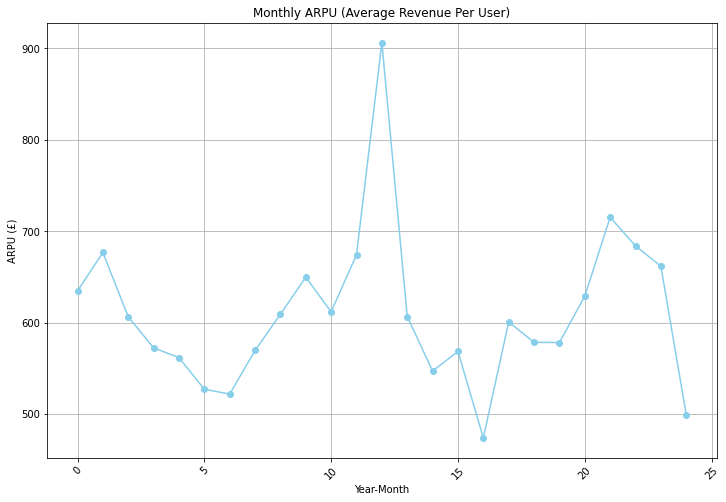

In [359]:
#시각화코드
plt.figure(figsize=(12, 8))

arpu.plot(kind='line', marker='o', color='skyblue')

plt.title("Monthly ARPU (Average Revenue Per User)")
plt.xlabel("Year-Month")
plt.ylabel("ARPU (£)")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Revenue(CLV)

- 고객 생애 가치를 예측하기 위해 **CLV**를 계산하고 표로 CLV기준으로 내림차순으로 정렬해보세요
- **CLV 식: 평균금액 x  평균 구매 빈도 x 고객유지기간**(단, Invoce Date의 최대 최소를 빼준 뒤 1을 더해주기)

In [360]:
retail

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,InvoiceDate_DT,Total,First_invoice,InvoiceQuarter,CohortQuarter,CohortIndex,YearMonth
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085,United Kingdom,2009-12-01 07:45:00,83.40,2009-12-01 07:45:00,2009Q4,2009Q4,0,2009-12
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom,2009-12-01 07:45:00,81.00,2009-12-01 07:45:00,2009Q4,2009Q4,0,2009-12
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom,2009-12-01 07:45:00,81.00,2009-12-01 07:45:00,2009Q4,2009Q4,0,2009-12
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085,United Kingdom,2009-12-01 07:45:00,100.80,2009-12-01 07:45:00,2009Q4,2009Q4,0,2009-12
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085,United Kingdom,2009-12-01 07:45:00,30.00,2009-12-01 07:45:00,2009Q4,2009Q4,0,2009-12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1067357,581587,22555,PLASTERS IN TIN STRONGMAN,12,2011-12-09 12:50:00,1.65,12680,France,2011-12-09 12:50:00,19.80,2011-08-18 15:44:00,2011Q4,2011Q3,1,2011-12
1067356,581587,22556,PLASTERS IN TIN CIRCUS PARADE,12,2011-12-09 12:50:00,1.65,12680,France,2011-12-09 12:50:00,19.80,2011-08-18 15:44:00,2011Q4,2011Q3,1,2011-12
1067369,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680,France,2011-12-09 12:50:00,14.85,2011-08-18 15:44:00,2011Q4,2011Q3,1,2011-12
1067361,581587,22730,ALARM CLOCK BAKELIKE IVORY,4,2011-12-09 12:50:00,3.75,12680,France,2011-12-09 12:50:00,15.00,2011-08-18 15:44:00,2011Q4,2011Q3,1,2011-12


In [361]:
retail.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 824364 entries, 0 to 1067370
Data columns (total 15 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   Invoice         824364 non-null  object        
 1   StockCode       824364 non-null  object        
 2   Description     824364 non-null  object        
 3   Quantity        824364 non-null  int64         
 4   InvoiceDate     824364 non-null  datetime64[ns]
 5   Price           824364 non-null  float64       
 6   Customer ID     824364 non-null  int64         
 7   Country         824364 non-null  object        
 8   InvoiceDate_DT  824364 non-null  datetime64[ns]
 9   Total           824364 non-null  float64       
 10  First_invoice   824364 non-null  datetime64[ns]
 11  InvoiceQuarter  824364 non-null  period[Q-DEC] 
 12  CohortQuarter   824364 non-null  period[Q-DEC] 
 13  CohortIndex     824364 non-null  int64         
 14  YearMonth       824364 non-null  pe

In [362]:
# 고객 별 총 구매금액, 총 구매 횟수, 첫 구매일, 마지막 구매일 
customer_metrics = retail.groupby('Customer ID').agg({'Total': 'sum',
                                                      'Invoice': 'nunique',
                                                      'InvoiceDate': ['min', 'max']})

In [363]:
# 컬럼 이름 정해주기
customer_metrics.columns = ['TotalRevenue', 'Frequency', 'FirstPurchaseDate', 'LastPurchaseDate']
customer_metrics

,TotalRevenue,Frequency,FirstPurchaseDate,LastPurchaseDate
Customer ID,,,,
12346,-64.68,17,2009-12-14 08:34:00,2011-01-18 10:17:00
12347,5633.32,8,2010-10-31 14:20:00,2011-12-07 15:52:00
12348,2019.40,5,2010-09-27 14:59:00,2011-09-25 13:13:00
12349,4404.54,5,2009-12-04 12:49:00,2011-11-21 09:51:00
12350,334.40,1,2011-02-02 16:01:00,2011-02-02 16:01:00
...,...,...,...,...
18283,2736.65,22,2010-02-19 17:16:00,2011-12-06 12:02:00
18284,436.68,2,2010-10-04 11:33:00,2010-10-06 12:31:00
18285,427.00,1,2010-02-17 10:24:00,2010-02-17 10:24:00


In [364]:
# 평균 구매 금액 (총 금액 / 총 구매횟수)
customer_metrics['AvgPurchaseValue'] = customer_metrics['TotalRevenue'] / customer_metrics['Frequency']

# 고객 구매 활동 기간 (0일이 나올 경우 최소 1일로 보정)
customer_metrics['CustomerLifespan'] = ((customer_metrics['LastPurchaseDate'] - 
                                         customer_metrics['FirstPurchaseDate']).dt.days)
customer_metrics['CustomerLifespan'] = customer_metrics['CustomerLifespan'].apply(lambda x: max(x, 1))

# CLV 계산
customer_metrics['CLV'] = (customer_metrics['AvgPurchaseValue'] *
                           customer_metrics['Frequency'] *
                           customer_metrics['CustomerLifespan'])

# 필요한 컬럼만 선택하고 정렬
clv_table = customer_metrics[['CLV', 'TotalRevenue', 
                              'Frequency', 
                              'CustomerLifespan']].sort_values(by='CLV', ascending=False)

clv_table

,CLV,TotalRevenue,Frequency,CustomerLifespan
Customer ID,,,,
18102,4.414828e+08,598215.22,153,738
14646,3.846564e+08,523342.07,164,735
14156,2.158991e+08,296564.69,202,728
14911,1.991732e+08,270248.53,510,737
13694,1.394935e+08,190825.52,164,731
...,...,...,...,...
14213,-3.815040e+04,-1192.20,2,32
13776,-8.640318e+04,-340.17,8,254
13091,-9.245620e+04,-130.22,6,710


In [365]:
# 인덱스(Customer ID)를 컬럼으로 만들어주기
clv_table = clv_table.reset_index()

# 결과 확인 (상위 10개)
clv_table

,Customer ID,CLV,TotalRevenue,Frequency,CustomerLifespan
0,18102,4.414828e+08,598215.22,153,738
1,14646,3.846564e+08,523342.07,164,735
2,14156,2.158991e+08,296564.69,202,728
3,14911,1.991732e+08,270248.53,510,737
4,13694,1.394935e+08,190825.52,164,731
...,...,...,...,...,...
5937,14213,-3.815040e+04,-1192.20,2,32
5938,13776,-8.640318e+04,-340.17,8,254
5939,13091,-9.245620e+04,-130.22,6,710
5940,15413,-7.796650e+05,-2531.38,7,308


# 기초통계 문제
### 문제 10 ~ 13: 기본 통계분포 함수를 이용하여 문제를 풀어보세요.

문제 10
* 어떤 회사의 고객 대기시간은 5분에서 15분 사이의 균등분포를 따릅니다. 
* 고객 100명이 대기한 시간을 시뮬레이션하고, 평균 대기시간과 표준편차를 계산하세요.

In [372]:
# 고객 100명의 시간 (대기시간 5~15분 사이의 균등분포) 설정하기
waiting_times = np.random.uniform(low=5, high=15, size=100)

In [369]:
# 평균과 표준편차 계산
mean_waiting_time = np.mean(waiting_times)
std_waiting_time = np.std(waiting_times)

In [370]:
# 출력
print(f"평균 대기시간: {mean_waiting_time:.2f}")
print(f"표준편차: {std_waiting_time:.2f}")

평균 대기시간: 10.03
표준편차: 2.75


문제11

- 한 신제품의 초기 성공 확률이 0.3이라고 가정합니다. 10회의 시뮬레이션에서 성공한 횟수를 구하고, 각 성공 여부를 출력하세요.

In [379]:
from scipy.stats import bernoulli

p = 0.3
size = 10

outcomes = bernoulli.rvs(p, size=size)
success_count = np.sum(outcomes)

In [380]:
print(f"각 시도 결과: {outcomes}")
print(f"성공 횟수: {success_count}")

각 시도 결과: [1 0 1 0 0 1 0 1 0 0]
성공 횟수: 4


문제12

- 한 수업에서 학생 20명이 5문제로 구성된 퀴즈를 치릅니다. 
- 각 문제의 정답 확률은 0.7이라고 가정할 때, 각 학생이 맞힌 점수를 시뮬레이션하고, 전체 학생의 평균 점수를 계산하세요.

In [384]:
from scipy.stats import binom

# 학생수, 문제 수, 정답확률
students = 20
questions = 5
p = 0.7

# 각 학생 점수 시뮬레이션
scores = binom.rvs(n=questions, p=p, size=students)

# 평균 점수 계산
average_score = np.mean(scores)

print(f"학생별 점수: {scores}")
print(f"평균 점수: {average_score:.2f}")

학생별 점수: [4 2 3 3 2 3 4 3 3 4 4 3 4 2 2 4 2 2 4 2]
평균 점수: 3.00


문제13

- 한 공장에서 생산되는 제품의 무게는 평균 50g, 표준편차 5g의 정규분포를 따릅니다.
- 1000개의 제품 무게를 시뮬레이션하고, 무게가 45g 이상 55g 이하인 제품의 비율을 계산(변수명: `within_range`)하세요. 무게 분포의 히스토그램을 그리세요.

In [393]:
import matplotlib.pyplot as plt
from scipy.stats import norm

# 정규 분포 파라미터: 평균, 표준편차, 데이터 샘플 수
mu = 50
sigma = 5
num_of_samples = 1000

# 샘플 생성
weights = norm.rvs(loc=mu, scale=sigma, size=num_of_samples, random_state=0)

# 45g 이상 55g 이하의 비율 계산
conds = (weights >= 45) & (weights <= 55)
within_range = len(weights[conds]) / len(weights)

print(f'45g 이상 55g 이하의 비율 계산: {within_range:.2f}')

45g 이상 55g 이하의 비율 계산: 0.70


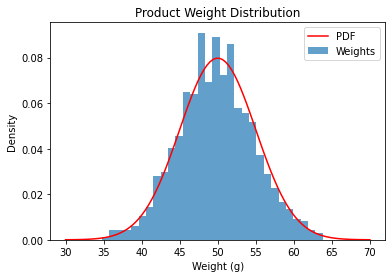

45g 이상 55g 이하 비율: 69.90%


In [394]:
# 히스토그램 그리기
plt.hist(weights, bins=30, density=True, alpha=0.7, label="Weights")
x = np.linspace(mu - 4*sigma, mu + 4*sigma, 100)
plt.plot(x, norm.pdf(x, mu, sigma), 'r-', label="PDF")
plt.xlabel("Weight (g)")
plt.ylabel("Density")
plt.title("Product Weight Distribution")
plt.legend()
plt.show()

print(f"45g 이상 55g 이하 비율: {within_range:.2%}")